In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import scipy.io as sio
from scipy.optimize import curve_fit
from scipy.stats import norm, gamma
from scipy import signal
import statsmodels.api as sm
import pandas as pd
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

## Cross Spectrum Analysis
#### looking for periodicities in these two timeseries and relationships between the two timeseries that will be revealed by cross-spectral analysis

In [2]:
# load data
fpath = '' # same as current folder
file = 'HW6Spectral_2020.mat'
mat_file = sio.loadmat(fpath + file)
del mat_file['__header__']
del mat_file['__version__']
del mat_file['__globals__']
print(mat_file.keys())
mat_file

dict_keys(['x552csp', 'y552csp'])


{'x552csp': array([[-1.11378269],
        [-9.38319819],
        [-8.45840232],
        ...,
        [11.67120146],
        [-2.25360324],
        [ 4.09651434]]),
 'y552csp': array([[ -2.04318497],
        [  4.37527431],
        [  3.66378498],
        ...,
        [-13.85737401],
        [-14.30147476],
        [-16.23494884]])}

In [3]:
# create variables for
x = mat_file['x552csp'].squeeze() # 365.25 days * 16 yrs
y = mat_file['y552csp'].squeeze() # 365.25 days * 16 yrs

ndays = len(x)
ndpery = 365.25
nyears = len(x)/ndpery
t = np.arange(0,ndays) # time values of 0 to ndays

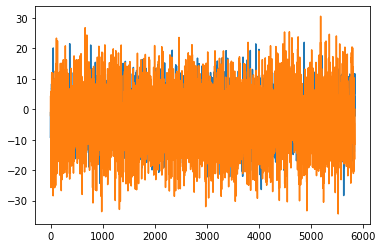

In [4]:
plt.plot(x)
plt.plot(y)

(0, 730)

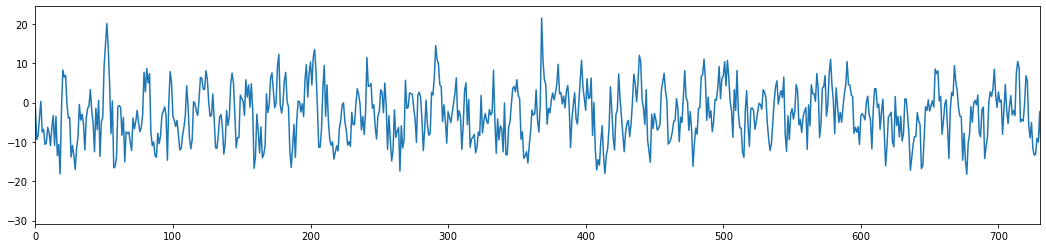

In [46]:
fig, ax = plt.subplots(figsize=(18,4))
plt.plot(x)
plt.xlim(0,365*2)

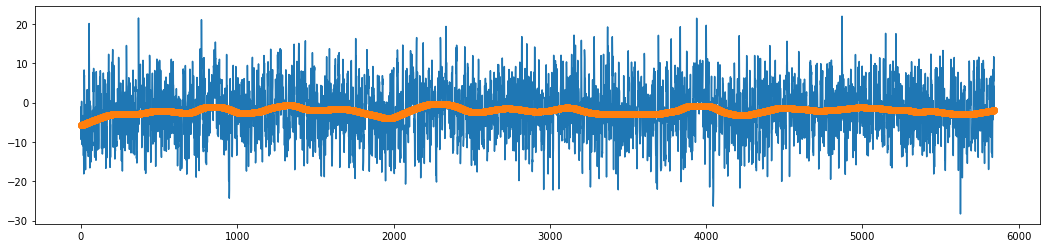

In [6]:
# attempt at lowess regression
lowess = sm.nonparametric.lowess
z = lowess(x,t,frac=1/16,return_sorted=False)

fig, ax = plt.subplots(figsize=(18,4))
plt.plot(x)
plt.plot(z,marker='o')

In [7]:
# check for linear trend in data
xreg = stats.linregress(t,x)
yreg = stats.linregress(t,y)
print(xreg) # x-value does not have sig trend
print(yreg) # y-value has a significant trend

LinregressResult(slope=4.993012668238438e-05, intercept=-2.245546679359339, rvalue=0.012424654113090903, pvalue=0.34229047014190706, stderr=5.257315738583469e-05)
LinregressResult(slope=0.00016050001773580075, intercept=-4.107405861417056, rvalue=0.028628452985233116, pvalue=0.028632270642650864, stderr=7.331931244657884e-05)


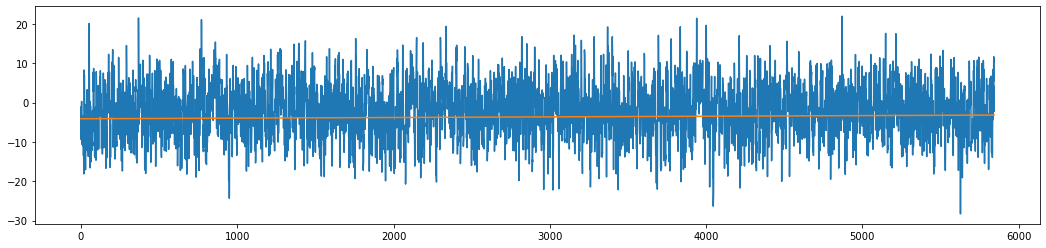

In [8]:
temp = yreg.intercept+yreg.slope*t
fig, ax = plt.subplots(figsize=(18,4))
plt.plot(x)
plt.plot(temp)#,marker='o')

In [9]:
ff = np.fft.fft(x,n=256)

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


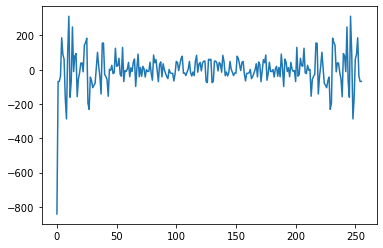

In [10]:
plt.plot(ff)

In [11]:
x[0::365]

array([ -1.11378269,  -4.51659752,  -2.3053411 ,  -0.54980771,
       -11.0441002 ,   3.41288767,  15.22064305,   5.59561513,
        -5.71381233,  12.49051201,  -8.16370035,   4.28218382,
         6.6485265 ,   7.10793381,   0.76913656,  -2.78383056,
         7.4400639 ])

## Using WOSA on each time series

In [47]:
fs = 2**8 #(256, always use power of two)#this is chunklength M


5844

256

In [74]:
days = np.arange(0,365)
vals = np.cos(np.pi)

6.123233995736766e-17

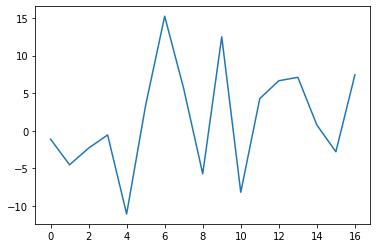

In [80]:
plt.plot(x[0::365])

In [77]:
x[0+365]

-4.516597521601234

In [87]:
x[0::365].mean()

1.5750899991813194

### ex. from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch

In [39]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

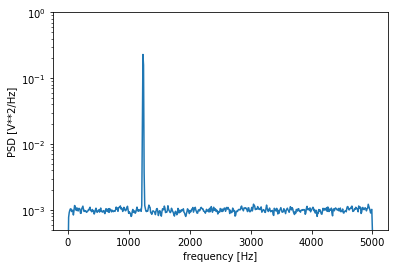

In [40]:
f, Pxx_den = signal.welch(x, fs,window='hann', nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [41]:
fs

10000.0